In [1]:
import pandas as pd

data  = pd.read_csv("dds_ch2_nyt/nyt17.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,63,1,2,0,1
1,0,0,7,0,0
2,0,0,8,0,0
3,0,0,4,0,0
4,61,1,6,0,1
...,...,...,...,...,...
445223,0,0,10,0,0
445224,17,0,5,0,1
445225,0,0,8,0,0
445226,0,0,8,0,0


In [2]:
data.isnull().sum()


Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445228 entries, 0 to 445227
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          445228 non-null  int64
 1   Gender       445228 non-null  int64
 2   Impressions  445228 non-null  int64
 3   Clicks       445228 non-null  int64
 4   Signed_In    445228 non-null  int64
dtypes: int64(5)
memory usage: 17.0 MB


In [4]:
data.Age.unique()

array([ 63,   0,  61,  60,  49,  41,  43,  47,  29,  35,  27,  52,  81,
        42,  48,  28,  51,  34,  37,  72,  53,  76,  16,  20,  71,  32,
        31,  24,  69,  50,  26,  59,  46,  78,  62,  58,  40,  22,  33,
        23,  30,  45,  36,  12,  44,  17,  57,  15,  55,  39,  21,  38,
        66,  75,  56,  19,  82,  18,  70,  14,  67,  25,  54,  65,  80,
        68,  77,  74,  73,  13,  64,  87,  79,  85,  84,  83,  10,  11,
        93,  88,   9,  91,  86, 100,  89,  90,  92,  94,  95,   7,   8,
        97,  96, 102,   6,  98,  99, 106, 115, 104, 101, 103])

In [5]:
data.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,199654,199654,199654,199654
6,2,2,2,2
7,3,3,3,3
8,18,18,18,18
9,36,36,36,36
...,...,...,...,...
102,3,3,3,3
103,1,1,1,1
104,1,1,1,1


In [6]:
data[data.Age==0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,199654,199654,199654,199654


In [7]:
data[data.Age>0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,116544,116544,116544,116544
1,129030,129030,129030,129030


In [8]:
data_no_null_age = data[(data.Signed_In == 1) & (data.Age > 0)]
data_no_null_age

,Age,Gender,Impressions,Clicks,Signed_In
0,63,1,2,0,1
4,61,1,6,0,1
6,60,1,4,0,1
9,49,0,7,0,1
11,41,1,3,0,1
...,...,...,...,...,...
445220,64,1,5,0,1
445221,31,1,4,0,1
445222,59,1,3,1,1
445224,17,0,5,0,1


In [9]:
data_no_null_age_1 = data[(data.Signed_In == 1)]
data_no_null_age_2 = data[(data.Age > 0)]
print(len(data_no_null_age_1), len(data_no_null_age_2), sep='\n')

245574
245574


<AxesSubplot: >

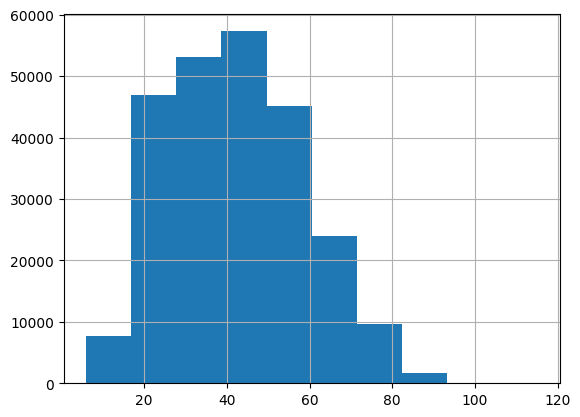

In [10]:
data_no_null_age.Age.hist()

In [11]:
def filter_age_group(age):
    if (age < 18):
        return "<18"
    elif (age < 25):
        return "18-24"
    elif (age < 35):
        return "25-34"
    elif (age < 45):
        return "35-44"
    elif (age < 55):
        return "45-54"
    elif (age < 65):
        return "55-64"
    elif (age >= 65):
        return "65+"

grouped_age_data = data_no_null_age
grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: filter_age_group(x))
grouped_age_data

/var/folders/tq/13d3hm697ds01qx5n95rx5fr0000gn/T/ipykernel_45686/2616599925.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: filter_age_group(x))


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,63,1,2,0,1,55-64
4,61,1,6,0,1,55-64
6,60,1,4,0,1,55-64
9,49,0,7,0,1,45-54
11,41,1,3,0,1,35-44
...,...,...,...,...,...,...
445220,64,1,5,0,1,55-64
445221,31,1,4,0,1,25-34
445222,59,1,3,1,1,55-64
445224,17,0,5,0,1,<18


<AxesSubplot: xlabel='age_group', ylabel='CTR'>

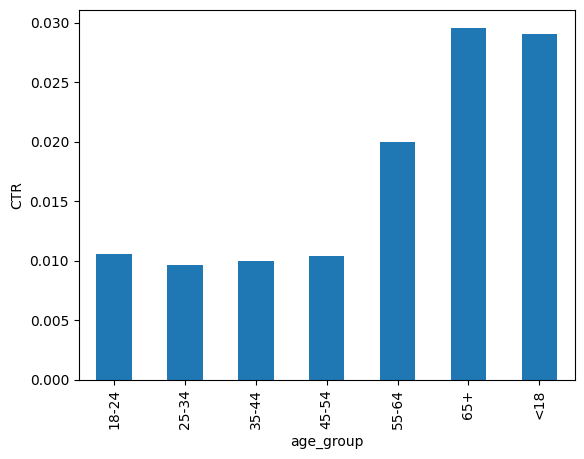

In [12]:
grouped_data = data_no_null_age[["Age", "Impressions", "Clicks", "age_group"]].groupby("age_group").mean()
grouped_data["CTR"] = grouped_data.Clicks / grouped_data.Impressions
grouped_data.CTR.plot(kind="bar", ylabel="CTR")

/var/folders/tq/13d3hm697ds01qx5n95rx5fr0000gn/T/ipykernel_45686/545494880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data.loc[grouped_age_data['Gender']==0, 'full_gender'] = 'Female'


<AxesSubplot: xlabel='age_group,full_gender'>

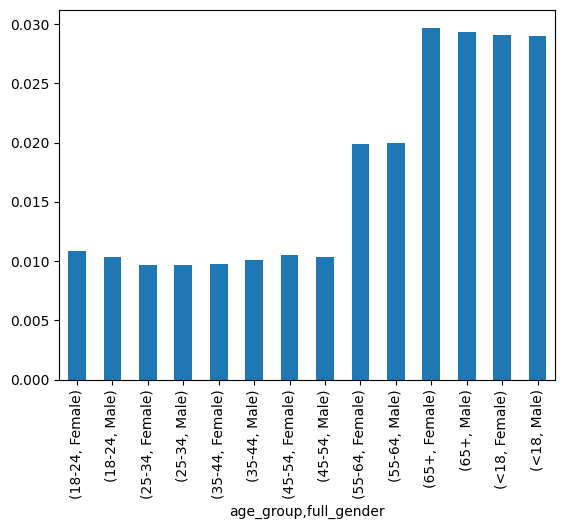

In [13]:
grouped_age_data.loc[grouped_age_data['Gender']==0, 'full_gender'] = 'Female'
grouped_age_data.loc[grouped_age_data['Gender']==1, 'full_gender'] = 'Male'
grouped_data = grouped_age_data.groupby(["age_group","full_gender"]).mean()
CTR = grouped_data.Clicks / grouped_data.Impressions
CTR.plot(kind="bar")

/var/folders/tq/13d3hm697ds01qx5n95rx5fr0000gn/T/ipykernel_45686/206725730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data.loc[grouped_age_data['Signed_In']==0, 'authorized'] = 'Authorized'
/var/folders/tq/13d3hm697ds01qx5n95rx5fr0000gn/T/ipykernel_45686/206725730.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_age_data.groupby(["age_group","authorized"]).mean()


<AxesSubplot: xlabel='age_group,authorized'>

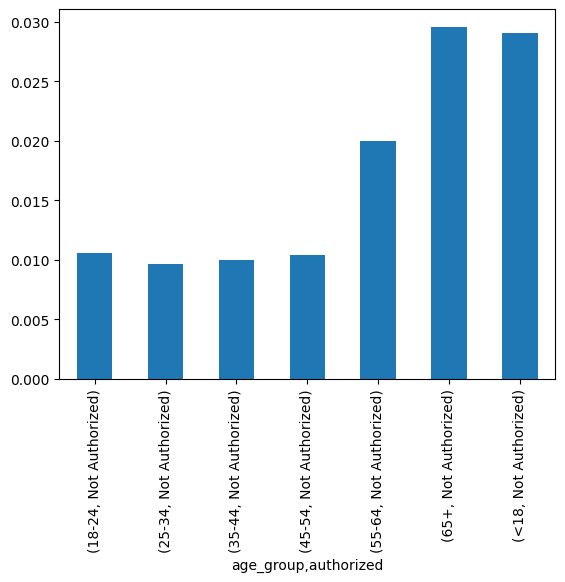

In [14]:
grouped_age_data.loc[grouped_age_data['Signed_In']==0, 'authorized'] = 'Authorized'
grouped_age_data.loc[grouped_age_data['Signed_In']==1, 'authorized'] = 'Not Authorized'
grouped_data = grouped_age_data.groupby(["age_group","authorized"]).mean()
CTR = grouped_data.Clicks / grouped_data.Impressions
CTR.plot(kind="bar")

In [15]:
authorized_users = grouped_age_data.loc[data["Gender"] == 0]
authorized_users.groupby(["age_group"]).Impressions.mean()

age_group
18-24    5.029749
25-34    4.991202
35-44    5.012639
45-54    4.977415
55-64    4.978863
65+      5.009476
<18      4.996454
Name: Impressions, dtype: float64

In [16]:
authorized_users = grouped_age_data.loc[data["Gender"] == 0]
authorized_users.groupby(["age_group"]).Impressions.median()

age_group
18-24    5.0
25-34    5.0
35-44    5.0
45-54    5.0
55-64    5.0
65+      5.0
<18      5.0
Name: Impressions, dtype: float64

In [17]:
authorized_users = grouped_age_data.loc[data["Gender"] == 0]
authorized_users.groupby(["age_group"]).Impressions.max()

age_group
18-24    15
25-34    15
35-44    19
45-54    15
55-64    18
65+      14
<18      14
Name: Impressions, dtype: int64

In [18]:
authorized_users = grouped_age_data.loc[data["Gender"] == 0]
authorized_users.groupby(["age_group"]).Impressions.std()

age_group
18-24    2.229177
25-34    2.222462
35-44    2.229968
45-54    2.217785
55-64    2.229768
65+      2.221068
<18      2.272193
Name: Impressions, dtype: float64